Akar ditemukan setelah 23 iterasi.


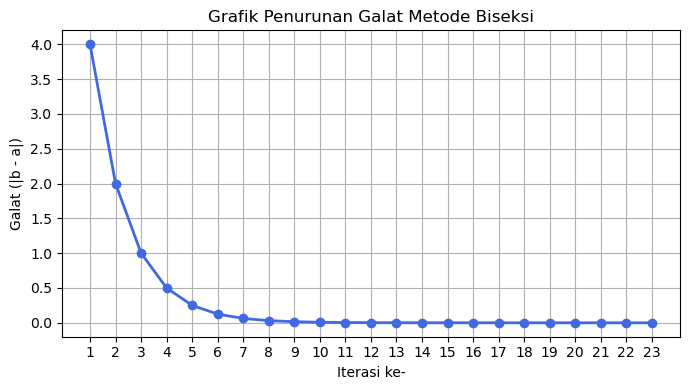


Akar dari f(x) = 0 adalah: -2.350780963897705


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def metode_biseksi(fungsi, batas_bawah, batas_atas, toleransi=1e-6, iterasi_maks=100):
    # Pastikan fungsi memiliki tanda berbeda di batas bawah dan atas
    if fungsi(batas_bawah) * fungsi(batas_atas) > 0:
        print("Tanda fungsi pada interval [a, b] sama. Tidak dapat diterapkan metode Biseksi.")
        return None, None

    hasil_iterasi = []
    
    for langkah in range(1, iterasi_maks + 1):
        titik_tengah = (batas_bawah + batas_atas) / 2
        nilai_tengah = fungsi(titik_tengah)
        galat = abs(batas_atas - batas_bawah)
        
        hasil_iterasi.append([langkah, galat])
        
        # Kondisi berhenti jika sudah sesuai toleransi
        if abs(nilai_tengah) < toleransi or galat < toleransi:
            print(f"Akar ditemukan setelah {langkah} iterasi.")
            break
        
        # Perbarui interval berdasarkan tanda fungsi
        if fungsi(batas_bawah) * nilai_tengah < 0:
            batas_atas = titik_tengah
        else:
            batas_bawah = titik_tengah
    
    # Simpan data hasil iterasi ke dalam DataFrame
    df = pd.DataFrame(hasil_iterasi, columns=["Iterasi", "Galat"])
    
    # --- BAGIAN GRAFIK ---
    plt.figure(figsize=(7, 4))
    plt.plot(df["Iterasi"], df["Galat"], marker='o', color='royalblue', linewidth=2)
    plt.title("Grafik Penurunan Galat Metode Biseksi")
    plt.xlabel("Iterasi ke-")
    plt.ylabel("Galat (|b - a|)")
    plt.grid(True)
    plt.xticks(df["Iterasi"])  # tampilkan semua label iterasi
    plt.tight_layout()
    plt.show()
    
    return titik_tengah, df


# Contoh fungsi uji
def fungsi(x):
    return 2*x**2 + 3*x - 4

# Batas interval
batas_bawah = -4
batas_atas = 0

akar, df_biseksi = metode_biseksi(fungsi, batas_bawah, batas_atas)
print("\nAkar dari f(x) = 0 adalah:", akar)
